In [ ]:
# Save preprocessed data and preprocessing pipeline for future use
import joblib

# Save the preprocessor for future use
joblib.dump(preprocessor, 'data/preprocessor.pkl')

# Save processed data arrays
np.save('data/X_train.npy', X_train)
np.save('data/X_test.npy', X_test)
np.save('data/y_train.npy', y_train)
np.save('data/y_test.npy', y_test)

# Save feature names
with open('data/feature_names.txt', 'w') as f:
    for feature in feature_names:
        f.write(f"{feature}\n")

print("Preprocessed data and pipeline saved:")
print("✓ preprocessor.pkl - Preprocessing pipeline")
print("✓ X_train.npy, X_test.npy - Feature matrices")
print("✓ y_train.npy, y_test.npy - Target vectors")
print("✓ feature_names.txt - Feature names list")
print("\nData is ready for machine learning model development!")

In [ ]:
### 9.5 Train-Test Split and Final Summary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print("Data split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")

# Class distribution in splits
print(f"\nClass distribution in training set:")
print(f"<=50K: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f">50K: {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")

print(f"\nClass distribution in testing set:")
print(f"<=50K: {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")
print(f">50K: {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")

# Save preprocessed data for ML modeling
print("\n" + "="*60)
print("PREPROCESSING SUMMARY")
print("="*60)
print(f"✓ Original dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"✓ Missing values handled: Replaced '?' with mode values")
print(f"✓ Categorical encoding: One-hot encoding applied")
print(f"✓ Numerical scaling: StandardScaler applied to continuous variables")
print(f"✓ Binary features created: has_capital_gain, has_capital_loss")
print(f"✓ Final feature matrix: {X_processed.shape[1]} features")
print(f"✓ Train-test split: 80%-20% stratified split")
print(f"✓ Ready for machine learning modeling")

# Create a DataFrame with feature names for easier inspection
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)
print(f"\nFirst few rows of preprocessed features:")
print(X_processed_df.head())

In [ ]:
### 9.4 Apply One-Hot Encoding and Scaling

# Prepare features and target
X = df_ml.drop(['income', 'income_binary', 'native.country'], axis=1)  # Drop original native.country
y = df_ml['income_binary']

print("Preparing final feature matrix...")
print(f"Feature matrix shape before encoding: {X.shape}")
print(f"Target variable shape: {y.shape}")

# Create preprocessing pipeline
# One-hot encode categorical variables
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Scale numerical variables (excluding binary features)
numerical_cols_to_scale = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
binary_cols = ['has_capital_gain', 'has_capital_loss']

# Combine numerical columns
numerical_transformer = StandardScaler()

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_to_scale),
        ('cat', categorical_transformer, categorical_cols_final),
        ('binary', 'passthrough', binary_cols)  # Keep binary features as is
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

print(f"Feature matrix shape after encoding: {X_processed.shape}")

# Get feature names for the processed matrix
feature_names = (
    numerical_cols_to_scale + 
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols_final)) +
    binary_cols
)

print(f"Total number of features: {len(feature_names)}")
print(f"Feature categories:")
print(f"  - Numerical (scaled): {len(numerical_cols_to_scale)}")
print(f"  - Categorical (one-hot): {len(feature_names) - len(numerical_cols_to_scale) - len(binary_cols)}")
print(f"  - Binary: {len(binary_cols)}")

print("✓ Feature encoding and scaling completed")

In [ ]:
### 9.3 Encode Categorical Features

# Define categorical and numerical columns
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 
                   'relationship', 'race', 'sex', 'native.country']
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 
                 'hours.per.week', 'has_capital_gain', 'has_capital_loss']

print("Encoding categorical variables...")
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# For categories with many unique values, we'll use binary encoding or grouping
# Let's check cardinality of categorical variables
print(f"\nCardinality of categorical variables:")
for col in categorical_cols:
    print(f"{col}: {df_ml[col].nunique()} unique values")

# Strategy:
# - High cardinality variables (native.country): Group less frequent categories
# - Medium cardinality variables: Use one-hot encoding
# - Low cardinality variables: Use one-hot encoding

# Group low-frequency native countries into 'Other'
country_counts = df_ml['native.country'].value_counts()
top_countries = country_counts.head(10).index.tolist()
df_ml['native.country_grouped'] = df_ml['native.country'].apply(
    lambda x: x if x in top_countries else 'Other'
)

print(f"\nNative country grouping:")
print(f"Original unique countries: {df_ml['native.country'].nunique()}")
print(f"After grouping: {df_ml['native.country_grouped'].nunique()}")
print(f"Top countries kept: {top_countries}")

# Update categorical columns list
categorical_cols_final = ['workclass', 'education', 'marital.status', 'occupation', 
                         'relationship', 'race', 'sex', 'native.country_grouped']

print("✓ Categorical feature preparation completed")

In [ ]:
### 9.2 Create Binary Features for Capital Gains and Losses

# Create binary features for presence/absence of capital gains and losses
df_ml['has_capital_gain'] = (df_ml['capital.gain'] > 0).astype(int)
df_ml['has_capital_loss'] = (df_ml['capital.loss'] > 0).astype(int)

print("Binary capital features created:")
print(f"Capital gains distribution:")
print(df_ml['has_capital_gain'].value_counts())
print(f"Percentage with capital gains: {df_ml['has_capital_gain'].mean()*100:.1f}%")

print(f"\nCapital losses distribution:")
print(df_ml['has_capital_loss'].value_counts())
print(f"Percentage with capital losses: {df_ml['has_capital_loss'].mean()*100:.1f}%")

# Show correlation with income
print(f"\nCorrelation with income:")
# Convert income to binary for correlation
df_ml['income_binary'] = (df_ml['income'] == '>50K').astype(int)
print(f"has_capital_gain vs income: {df_ml['has_capital_gain'].corr(df_ml['income_binary']):.3f}")
print(f"has_capital_loss vs income: {df_ml['has_capital_loss'].corr(df_ml['income_binary']):.3f}")
print("✓ Binary capital features created")

In [ ]:
### 9.1 Handle Missing Values ('?' entries)

# Replace '?' with NaN for proper handling
df_ml = df_ml.replace('?', np.nan)

# Check missing values after replacement
print("Missing values after replacing '?' with NaN:")
missing_counts = df_ml.isnull().sum()
print(missing_counts[missing_counts > 0])

# Strategy for handling missing values:
# - workclass: Use mode (most frequent category)
# - occupation: Use mode (most frequent category)  
# - native.country: Use mode (most frequent category)

# Fill missing values with mode
for col in ['workclass', 'occupation', 'native.country']:
    if col in df_ml.columns:
        mode_value = df_ml[col].mode()[0]
        df_ml[col].fillna(mode_value, inplace=True)
        print(f"Filled {col} missing values with mode: {mode_value}")

# Verify no missing values remain
print(f"\nMissing values after imputation: {df_ml.isnull().sum().sum()}")
print("✓ Missing value handling completed")

In [ ]:
# Import additional libraries for preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Create a copy of the dataset for preprocessing
df_ml = df.copy()

print("Starting data preprocessing for machine learning...")
print(f"Original dataset shape: {df_ml.shape}")
print(f"Columns with '?' values before preprocessing:")
for col in df_ml.columns:
    if df_ml[col].dtype == 'object':
        question_marks = (df_ml[col] == '?').sum()
        if question_marks > 0:
            print(f"  {col}: {question_marks} ({question_marks/len(df_ml)*100:.1f}%)")

In [ ]:
# Comprehensive summary of findings
print("CAPITAL GAINS AND LOSSES ANALYSIS - KEY FINDINGS")
print("="*70)

print(f"\n1. DATASET OVERVIEW:")
print(f"   • Total sample size: {len(df_clean):,} individuals")
print(f"   • High income rate (>$50K): {df_clean['income_binary'].mean():.1%}")
print(f"   • Low income rate (≤$50K): {(1-df_clean['income_binary'].mean()):.1%}")

print(f"\n2. CAPITAL GAINS DISTRIBUTION:")
print(f"   • Mean capital gains: ${df_clean['capital.gain'].mean():.2f}")
print(f"   • Median capital gains: ${df_clean['capital.gain'].median():.2f}")
print(f"   • People with non-zero capital gains: {(df_clean['capital.gain'] > 0).sum():,} ({(df_clean['capital.gain'] > 0).mean()*100:.1f}%)")
print(f"   • People with zero capital gains: {(df_clean['capital.gain'] == 0).sum():,} ({(df_clean['capital.gain'] == 0).mean()*100:.1f}%)")

print(f"\n3. CAPITAL LOSSES DISTRIBUTION:")
print(f"   • Mean capital losses: ${df_clean['capital.loss'].mean():.2f}")
print(f"   • Median capital losses: ${df_clean['capital.loss'].median():.2f}")
print(f"   • People with non-zero capital losses: {(df_clean['capital.loss'] > 0).sum():,} ({(df_clean['capital.loss'] > 0).mean()*100:.1f}%)")
print(f"   • People with zero capital losses: {(df_clean['capital.loss'] == 0).sum():,} ({(df_clean['capital.loss'] == 0).mean()*100:.1f}%)")

print(f"\n4. INCOME GROUP DIFFERENCES:")
print(f"   Capital Gains:")
print(f"   • High income group mean: ${high_income['capital.gain'].mean():.2f}")
print(f"   • Low income group mean: ${low_income['capital.gain'].mean():.2f}")
print(f"   • Ratio (High/Low): {high_income['capital.gain'].mean()/low_income['capital.gain'].mean():.1f}x")
print(f"   Capital Losses:")
print(f"   • High income group mean: ${high_income['capital.loss'].mean():.2f}")
print(f"   • Low income group mean: ${low_income['capital.loss'].mean():.2f}")
print(f"   • Ratio (High/Low): {high_income['capital.loss'].mean()/low_income['capital.loss'].mean():.1f}x")

print(f"\n5. PREDICTIVE POWER:")
print(f"   Capital Gains:")
print(f"   • P(High Income | Has Capital Gains) = {prob_high_income_given_gains:.1%}")
print(f"   • P(High Income | No Capital Gains) = {prob_high_income_given_no_gains:.1%}")
print(f"   • Lift = {prob_high_income_given_gains/prob_high_income_given_no_gains:.1f}x")
print(f"   Capital Losses:")
print(f"   • P(High Income | Has Capital Losses) = {prob_high_income_given_losses:.1%}")
print(f"   • P(High Income | No Capital Losses) = {prob_high_income_given_no_losses:.1%}")
print(f"   • Lift = {prob_high_income_given_losses/prob_high_income_given_no_losses:.1f}x")

print(f"\n6. STATISTICAL SIGNIFICANCE:")
print(f"   • Capital Gains - Income correlation: {corr_gains:.4f} (p={p_corr_gains:.2e})")
print(f"   • Capital Losses - Income correlation: {corr_losses:.4f} (p={p_corr_losses:.2e})")
print(f"   • Has Capital Gains - Income correlation: {corr_has_gains:.4f} (p={p_corr_has_gains:.2e})")
print(f"   • Has Capital Losses - Income correlation: {corr_has_losses:.4f} (p={p_corr_has_losses:.2e})")
print(f"   • Chi-square p-value (Capital Gains): {p_gains:.2e}")
print(f"   • Chi-square p-value (Capital Losses): {p_losses:.2e}")

print(f"\n7. EFFECT SIZES:")
print(f"   • Capital Gains Cohen's d: {d_gains:.4f} ({interpret_cohens_d(d_gains)})")
print(f"   • Capital Losses Cohen's d: {d_losses:.4f} ({interpret_cohens_d(d_losses)})")
print(f"   • Capital Gains Cramer's V: {cramers_v_gains:.4f}")
print(f"   • Capital Losses Cramer's V: {cramers_v_losses:.4f}")

print(f"\n8. KEY CONCLUSIONS:")
print(f"   ✓ Capital gains are STRONG predictors of high income")
print(f"     - Having capital gains increases probability of high income by {gains_info_gain*100:.1f} percentage points")
print(f"     - {high_income_gains_pct:.1f}% of high earners have capital gains vs {low_income_gains_pct:.1f}% of low earners")
print(f"   ✓ Capital losses are also significant predictors of high income")
print(f"     - Having capital losses increases probability of high income by {losses_info_gain*100:.1f} percentage points")
print(f"     - {high_income_losses_pct:.1f}% of high earners have capital losses vs {low_income_losses_pct:.1f}% of low earners")
print(f"   ✓ Both capital gains and losses are statistically significant predictors (p < 0.001)")
print(f"   ✓ Capital gains show a {interpret_cohens_d(d_gains)} effect size")
print(f"   ✓ Capital losses show a {interpret_cohens_d(d_losses)} effect size")
print(f"   ✓ The majority of people ({(df_clean['capital.gain'] == 0).mean()*100:.1f}%) have zero capital gains")
print(f"   ✓ The majority of people ({(df_clean['capital.loss'] == 0).mean()*100:.1f}%) have zero capital losses")

print(f"\n9. PRACTICAL IMPLICATIONS:")
print(f"   • Capital gains/losses are strong indicators of investment activity")
print(f"   • Investment activity is strongly associated with higher income")
print(f"   • Having ANY capital gains/losses (even small amounts) is predictive")
print(f"   • These features should be valuable in income prediction models")
print(f"   • The binary indicators (has/doesn't have) may be more useful than continuous amounts")

print(f"\n10. RECOMMENDATION:")
print(f"   Based on this analysis, capital gains and losses are STRONG predictors of income")
print(f"   level and should be included in any income prediction model. The binary")
print(f"   indicators (presence/absence) are particularly powerful predictors.")

## 7. Key Findings and Conclusions

In [ ]:
# Statistical tests and correlation analysis
print("STATISTICAL TESTS AND CORRELATIONS")
print("="*60)

# 1. Chi-square test for independence
print("\n1. CHI-SQUARE TESTS FOR INDEPENDENCE:")

# Capital gains chi-square test
chi2_gains, p_gains, dof_gains, expected_gains = chi2_contingency(gains_crosstab)
print(f"\nCapital Gains vs Income:")
print(f"  Chi-square statistic: {chi2_gains:.4f}")
print(f"  P-value: {p_gains:.2e}")
print(f"  Degrees of freedom: {dof_gains}")
print(f"  Result: {'Significant' if p_gains < 0.05 else 'Not significant'} association")

# Capital losses chi-square test
chi2_losses, p_losses, dof_losses, expected_losses = chi2_contingency(losses_crosstab)
print(f"\nCapital Losses vs Income:")
print(f"  Chi-square statistic: {chi2_losses:.4f}")
print(f"  P-value: {p_losses:.2e}")
print(f"  Degrees of freedom: {dof_losses}")
print(f"  Result: {'Significant' if p_losses < 0.05 else 'Not significant'} association")

# 2. Point-biserial correlation
print(f"\n2. POINT-BISERIAL CORRELATIONS:")

# Capital gains correlation
corr_gains, p_corr_gains = pointbiserialr(df_clean['income_binary'], df_clean['capital.gain'])
print(f"Capital Gains - Income correlation: {corr_gains:.4f} (p={p_corr_gains:.2e})")

# Capital losses correlation  
corr_losses, p_corr_losses = pointbiserialr(df_clean['income_binary'], df_clean['capital.loss'])
print(f"Capital Losses - Income correlation: {corr_losses:.4f} (p={p_corr_losses:.2e})")

# Has capital gains correlation
corr_has_gains, p_corr_has_gains = pointbiserialr(df_clean['income_binary'], df_clean['has_capital_gains'])
print(f"Has Capital Gains - Income correlation: {corr_has_gains:.4f} (p={p_corr_has_gains:.2e})")

# Has capital losses correlation
corr_has_losses, p_corr_has_losses = pointbiserialr(df_clean['income_binary'], df_clean['has_capital_losses'])
print(f"Has Capital Losses - Income correlation: {corr_has_losses:.4f} (p={p_corr_has_losses:.2e})")

# 3. Mann-Whitney U test (non-parametric test for comparing distributions)
print(f"\n3. MANN-WHITNEY U TESTS:")

from scipy.stats import mannwhitneyu

# Capital gains comparison
u_gains, p_u_gains = mannwhitneyu(high_income['capital.gain'], low_income['capital.gain'], alternative='two-sided')
print(f"Capital Gains distribution comparison:")
print(f"  U-statistic: {u_gains:.0f}")
print(f"  P-value: {p_u_gains:.2e}")
print(f"  Result: {'Significant' if p_u_gains < 0.05 else 'Not significant'} difference in distributions")

# Capital losses comparison
u_losses, p_u_losses = mannwhitneyu(high_income['capital.loss'], low_income['capital.loss'], alternative='two-sided')
print(f"Capital Losses distribution comparison:")
print(f"  U-statistic: {u_losses:.0f}")
print(f"  P-value: {p_u_losses:.2e}")
print(f"  Result: {'Significant' if p_u_losses < 0.05 else 'Not significant'} difference in distributions")

# 4. Effect sizes (Cohen's d)
print(f"\n4. EFFECT SIZES (Cohen's d):")

def cohens_d(group1, group2):
    """Calculate Cohen's d for effect size"""
    n1, n2 = len(group1), len(group2)
    s1, s2 = group1.std(), group2.std()
    pooled_std = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
    return (group1.mean() - group2.mean()) / pooled_std

d_gains = cohens_d(high_income['capital.gain'], low_income['capital.gain'])
d_losses = cohens_d(high_income['capital.loss'], low_income['capital.loss'])

print(f"Capital Gains Cohen's d: {d_gains:.4f}")
print(f"Capital Losses Cohen's d: {d_losses:.4f}")

# Interpret effect sizes
def interpret_cohens_d(d):
    d_abs = abs(d)
    if d_abs < 0.2:
        return "negligible"
    elif d_abs < 0.5:
        return "small"
    elif d_abs < 0.8:
        return "medium"
    else:
        return "large"

print(f"Capital Gains effect size: {interpret_cohens_d(d_gains)}")
print(f"Capital Losses effect size: {interpret_cohens_d(d_losses)}")

# 5. Cramer's V (effect size for categorical associations)
print(f"\n5. CRAMER'S V (Effect size for categorical associations):")

def cramers_v(chi2, n, r, c):
    """Calculate Cramer's V"""
    return np.sqrt(chi2 / (n * min(r-1, c-1)))

n = len(df_clean)
cramers_v_gains = cramers_v(chi2_gains, n, 2, 2)
cramers_v_losses = cramers_v(chi2_losses, n, 2, 2)

print(f"Capital Gains Cramer's V: {cramers_v_gains:.4f}")
print(f"Capital Losses Cramer's V: {cramers_v_losses:.4f}")

# 6. Summary of all correlations
print(f"\n6. CORRELATION SUMMARY:")
correlation_data = [
    ['Capital Gains (continuous)', corr_gains, p_corr_gains],
    ['Capital Losses (continuous)', corr_losses, p_corr_losses],
    ['Has Capital Gains (binary)', corr_has_gains, p_corr_has_gains],
    ['Has Capital Losses (binary)', corr_has_losses, p_corr_has_losses]
]

corr_df = pd.DataFrame(correlation_data, columns=['Variable', 'Correlation', 'P-value'])
print(corr_df.to_string(index=False, float_format='%.4f'))

## 6. Statistical Tests and Correlations

In [ ]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribution of capital gains by income group
axes[0, 0].hist(low_income['capital.gain'], bins=50, alpha=0.7, label='≤$50K', color='lightcoral', density=True)
axes[0, 0].hist(high_income['capital.gain'], bins=50, alpha=0.7, label='>$50K', color='lightblue', density=True)
axes[0, 0].set_title('Distribution of Capital Gains by Income Group')
axes[0, 0].set_xlabel('Capital Gains ($)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 10000)  # Focus on lower range for better visibility

# 2. Distribution of capital losses by income group
axes[0, 1].hist(low_income['capital.loss'], bins=50, alpha=0.7, label='≤$50K', color='lightcoral', density=True)
axes[0, 1].hist(high_income['capital.loss'], bins=50, alpha=0.7, label='>$50K', color='lightblue', density=True)
axes[0, 1].set_title('Distribution of Capital Losses by Income Group')
axes[0, 1].set_xlabel('Capital Losses ($)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 3000)  # Focus on lower range for better visibility

# 3. Box plots for capital gains
df_clean.boxplot(column='capital.gain', by='income', ax=axes[0, 2])
axes[0, 2].set_title('Capital Gains by Income Group')
axes[0, 2].set_xlabel('Income Group')
axes[0, 2].set_ylabel('Capital Gains ($)')
axes[0, 2].set_ylim(0, 15000)  # Limit y-axis for better visibility

# 4. Box plots for capital losses
df_clean.boxplot(column='capital.loss', by='income', ax=axes[1, 0])
axes[1, 0].set_title('Capital Losses by Income Group')
axes[1, 0].set_xlabel('Income Group')
axes[1, 0].set_ylabel('Capital Losses ($)')
axes[1, 0].set_ylim(0, 4000)  # Limit y-axis for better visibility

# 5. Percentage with non-zero capital gains/losses
categories = ['Has Capital\nGains', 'Has Capital\nLosses']
low_income_pcts = [low_income_gains_pct, low_income_losses_pct]
high_income_pcts = [high_income_gains_pct, high_income_losses_pct]

x = np.arange(len(categories))
width = 0.35

axes[1, 1].bar(x - width/2, low_income_pcts, width, label='≤$50K', color='lightcoral')
axes[1, 1].bar(x + width/2, high_income_pcts, width, label='>$50K', color='lightblue')
axes[1, 1].set_title('Percentage with Non-Zero Capital Gains/Losses')
axes[1, 1].set_xlabel('Type')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(categories)
axes[1, 1].legend()

# Add value labels on bars
for i, (low, high) in enumerate(zip(low_income_pcts, high_income_pcts)):
    axes[1, 1].text(i - width/2, low + 0.5, f'{low:.1f}%', ha='center', va='bottom')
    axes[1, 1].text(i + width/2, high + 0.5, f'{high:.1f}%', ha='center', va='bottom')

# 6. Predictive power visualization
groups = ['Has Gains', 'No Gains', 'Has Losses', 'No Losses']
probabilities = [prob_high_income_given_gains, prob_high_income_given_no_gains, 
                prob_high_income_given_losses, prob_high_income_given_no_losses]
colors = ['darkgreen', 'lightgreen', 'darkred', 'lightpink']

bars = axes[1, 2].bar(groups, [p*100 for p in probabilities], color=colors)
axes[1, 2].set_title('High Income Probability by Capital Gains/Losses')
axes[1, 2].set_xlabel('Group')
axes[1, 2].set_ylabel('Probability of High Income (%)')
axes[1, 2].tick_params(axis='x', rotation=45)

# Add baseline line
axes[1, 2].axhline(y=baseline_prob*100, color='black', linestyle='--', alpha=0.7, label=f'Baseline ({baseline_prob*100:.1f}%)')
axes[1, 2].legend()

# Add value labels on bars
for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    axes[1, 2].text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{prob*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 5. Visualizations

In [ ]:
# Analyze predictive power of capital gains/losses
print("PREDICTIVE POWER ANALYSIS")
print("="*60)

# If someone has capital gains, what's the probability they have high income?
has_gains = df_clean['capital.gain'] > 0
has_losses = df_clean['capital.loss'] > 0

# Conditional probabilities for capital gains
prob_high_income_given_gains = df_clean[has_gains]['income_binary'].mean()
prob_high_income_given_no_gains = df_clean[~has_gains]['income_binary'].mean()

print(f"\nCAPITAL GAINS PREDICTIVE POWER:")
print(f"P(High Income | Has Capital Gains) = {prob_high_income_given_gains:.1%}")
print(f"P(High Income | No Capital Gains) = {prob_high_income_given_no_gains:.1%}")
print(f"Lift = {prob_high_income_given_gains/prob_high_income_given_no_gains:.1f}x")

# Conditional probabilities for capital losses
prob_high_income_given_losses = df_clean[has_losses]['income_binary'].mean()
prob_high_income_given_no_losses = df_clean[~has_losses]['income_binary'].mean()

print(f"\nCAPITAL LOSSES PREDICTIVE POWER:")
print(f"P(High Income | Has Capital Losses) = {prob_high_income_given_losses:.1%}")
print(f"P(High Income | No Capital Losses) = {prob_high_income_given_no_losses:.1%}")
print(f"Lift = {prob_high_income_given_losses/prob_high_income_given_no_losses:.1f}x")

# Combined analysis
has_both = has_gains & has_losses
has_either = has_gains | has_losses
has_neither = ~has_gains & ~has_losses

print(f"\nCOMBINED ANALYSIS:")
print(f"P(High Income | Has Both Gains & Losses) = {df_clean[has_both]['income_binary'].mean():.1%}")
print(f"P(High Income | Has Either Gains or Losses) = {df_clean[has_either]['income_binary'].mean():.1%}")
print(f"P(High Income | Has Neither Gains nor Losses) = {df_clean[has_neither]['income_binary'].mean():.1%}")

# Calculate sample sizes for each group
print(f"\nSAMPLE SIZES:")
print(f"Has capital gains: {has_gains.sum():,} ({has_gains.mean()*100:.1f}%)")
print(f"Has capital losses: {has_losses.sum():,} ({has_losses.mean()*100:.1f}%)")
print(f"Has both: {has_both.sum():,} ({has_both.mean()*100:.1f}%)")
print(f"Has either: {has_either.sum():,} ({has_either.mean()*100:.1f}%)")
print(f"Has neither: {has_neither.sum():,} ({has_neither.mean()*100:.1f}%)")

# Information gain / predictive value
baseline_prob = df_clean['income_binary'].mean()
print(f"\nBASELINE PROBABILITY:")
print(f"Overall P(High Income) = {baseline_prob:.1%}")

# Calculate information gain
print(f"\nINFORMATION GAIN:")
gains_info_gain = prob_high_income_given_gains - baseline_prob
losses_info_gain = prob_high_income_given_losses - baseline_prob

print(f"Capital gains information gain: {gains_info_gain:+.1%}")
print(f"Capital losses information gain: {losses_info_gain:+.1%}")

# Create a summary table
summary_data = []
summary_data.append(['Has Capital Gains', has_gains.sum(), prob_high_income_given_gains, gains_info_gain])
summary_data.append(['No Capital Gains', (~has_gains).sum(), prob_high_income_given_no_gains, prob_high_income_given_no_gains - baseline_prob])
summary_data.append(['Has Capital Losses', has_losses.sum(), prob_high_income_given_losses, losses_info_gain])
summary_data.append(['No Capital Losses', (~has_losses).sum(), prob_high_income_given_no_losses, prob_high_income_given_no_losses - baseline_prob])

summary_df = pd.DataFrame(summary_data, columns=['Group', 'Count', 'High_Income_Rate', 'Info_Gain'])
print(f"\nSUMMARY TABLE:")
print(summary_df.to_string(index=False, float_format='%.3f'))

## 4. Predictive Power Analysis

In [ ]:
# Analyze percentage of people with non-zero capital gains/losses by income group
print("NON-ZERO CAPITAL GAINS AND LOSSES BY INCOME GROUP")
print("="*60)

# Capital gains analysis
low_income_gains_pct = (low_income['capital.gain'] > 0).mean() * 100
high_income_gains_pct = (high_income['capital.gain'] > 0).mean() * 100

print(f"\nPERCENTAGE WITH NON-ZERO CAPITAL GAINS:")
print(f"Low income (≤$50K): {low_income_gains_pct:.1f}%")
print(f"High income (>$50K): {high_income_gains_pct:.1f}%")
print(f"Ratio (High/Low): {high_income_gains_pct/low_income_gains_pct:.1f}x")

# Capital losses analysis
low_income_losses_pct = (low_income['capital.loss'] > 0).mean() * 100
high_income_losses_pct = (high_income['capital.loss'] > 0).mean() * 100

print(f"\nPERCENTAGE WITH NON-ZERO CAPITAL LOSSES:")
print(f"Low income (≤$50K): {low_income_losses_pct:.1f}%")
print(f"High income (>$50K): {high_income_losses_pct:.1f}%")
print(f"Ratio (High/Low): {high_income_losses_pct/low_income_losses_pct:.1f}x")

# Create categorical variables for analysis
df_clean['has_capital_gains'] = (df_clean['capital.gain'] > 0).astype(int)
df_clean['has_capital_losses'] = (df_clean['capital.loss'] > 0).astype(int)

# Contingency table analysis
print(f"\nCONTINGENCY TABLE ANALYSIS:")

# Capital gains contingency table
gains_crosstab = pd.crosstab(df_clean['has_capital_gains'], df_clean['income'])
print(f"\nCapital Gains Contingency Table:")
print(gains_crosstab)
print(f"\nCapital Gains Proportions:")
print(pd.crosstab(df_clean['has_capital_gains'], df_clean['income'], normalize='columns').round(3))

# Capital losses contingency table
losses_crosstab = pd.crosstab(df_clean['has_capital_losses'], df_clean['income'])
print(f"\nCapital Losses Contingency Table:")
print(losses_crosstab)
print(f"\nCapital Losses Proportions:")
print(pd.crosstab(df_clean['has_capital_losses'], df_clean['income'], normalize='columns').round(3))

# Calculate odds ratios
print(f"\nODDS RATIO ANALYSIS:")

# Capital gains odds ratio
gains_odds_low = (low_income['capital.gain'] > 0).sum() / (low_income['capital.gain'] == 0).sum()
gains_odds_high = (high_income['capital.gain'] > 0).sum() / (high_income['capital.gain'] == 0).sum()
gains_odds_ratio = gains_odds_high / gains_odds_low

print(f"Capital Gains Odds Ratio: {gains_odds_ratio:.2f}")
print(f"  High income odds: {gains_odds_high:.3f}")
print(f"  Low income odds: {gains_odds_low:.3f}")

# Capital losses odds ratio
losses_odds_low = (low_income['capital.loss'] > 0).sum() / (low_income['capital.loss'] == 0).sum()
losses_odds_high = (high_income['capital.loss'] > 0).sum() / (high_income['capital.loss'] == 0).sum()
losses_odds_ratio = losses_odds_high / losses_odds_low

print(f"Capital Losses Odds Ratio: {losses_odds_ratio:.2f}")
print(f"  High income odds: {losses_odds_high:.3f}")
print(f"  Low income odds: {losses_odds_low:.3f}")

## 3. Non-Zero Capital Gains/Losses Analysis

In [ ]:
# Analyze capital gains and losses by income group
print("CAPITAL GAINS AND LOSSES BY INCOME GROUP")
print("="*60)

# Split data by income group
low_income = df_clean[df_clean['income'] == '<=50K']
high_income = df_clean[df_clean['income'] == '>50K']

print(f"\nSAMPLE SIZES:")
print(f"Low income (≤$50K): {len(low_income):,} individuals ({len(low_income)/len(df_clean)*100:.1f}%)")
print(f"High income (>$50K): {len(high_income):,} individuals ({len(high_income)/len(df_clean)*100:.1f}%)")

# Capital gains analysis by income group
print(f"\nCAPITAL GAINS BY INCOME GROUP:")
print(f"Low income group (≤$50K):")
print(f"  Mean: ${low_income['capital.gain'].mean():.2f}")
print(f"  Median: ${low_income['capital.gain'].median():.2f}")
print(f"  Std: ${low_income['capital.gain'].std():.2f}")
print(f"  25th percentile: ${low_income['capital.gain'].quantile(0.25):.2f}")
print(f"  75th percentile: ${low_income['capital.gain'].quantile(0.75):.2f}")
print(f"  90th percentile: ${low_income['capital.gain'].quantile(0.90):.2f}")
print(f"  95th percentile: ${low_income['capital.gain'].quantile(0.95):.2f}")

print(f"\nHigh income group (>$50K):")
print(f"  Mean: ${high_income['capital.gain'].mean():.2f}")
print(f"  Median: ${high_income['capital.gain'].median():.2f}")
print(f"  Std: ${high_income['capital.gain'].std():.2f}")
print(f"  25th percentile: ${high_income['capital.gain'].quantile(0.25):.2f}")
print(f"  75th percentile: ${high_income['capital.gain'].quantile(0.75):.2f}")
print(f"  90th percentile: ${high_income['capital.gain'].quantile(0.90):.2f}")
print(f"  95th percentile: ${high_income['capital.gain'].quantile(0.95):.2f}")

# Capital losses analysis by income group
print(f"\nCAPITAL LOSSES BY INCOME GROUP:")
print(f"Low income group (≤$50K):")
print(f"  Mean: ${low_income['capital.loss'].mean():.2f}")
print(f"  Median: ${low_income['capital.loss'].median():.2f}")
print(f"  Std: ${low_income['capital.loss'].std():.2f}")
print(f"  25th percentile: ${low_income['capital.loss'].quantile(0.25):.2f}")
print(f"  75th percentile: ${low_income['capital.loss'].quantile(0.75):.2f}")
print(f"  90th percentile: ${low_income['capital.loss'].quantile(0.90):.2f}")
print(f"  95th percentile: ${low_income['capital.loss'].quantile(0.95):.2f}")

print(f"\nHigh income group (>$50K):")
print(f"  Mean: ${high_income['capital.loss'].mean():.2f}")
print(f"  Median: ${high_income['capital.loss'].median():.2f}")
print(f"  Std: ${high_income['capital.loss'].std():.2f}")
print(f"  25th percentile: ${high_income['capital.loss'].quantile(0.25):.2f}")
print(f"  75th percentile: ${high_income['capital.loss'].quantile(0.75):.2f}")
print(f"  90th percentile: ${high_income['capital.loss'].quantile(0.90):.2f}")
print(f"  95th percentile: ${high_income['capital.loss'].quantile(0.95):.2f}")

# Ratio comparisons
gains_ratio = high_income['capital.gain'].mean() / low_income['capital.gain'].mean()
losses_ratio = high_income['capital.loss'].mean() / low_income['capital.loss'].mean()

print(f"\nRATIO COMPARISONS (High income vs Low income):")
print(f"Capital gains mean ratio: {gains_ratio:.1f}x")
print(f"Capital losses mean ratio: {losses_ratio:.1f}x")

## 2. Income Group Analysis (>$50K vs ≤$50K)

In [ ]:
# Basic statistics for capital gains and losses
print("CAPITAL GAINS AND LOSSES - BASIC STATISTICS")
print("="*60)

# Overall statistics
print("\n1. OVERALL STATISTICS:")
print(f"Dataset size: {len(df_clean):,} individuals")
print(f"High income rate (>$50K): {df_clean['income_binary'].mean():.1%}")

# Capital gains statistics
print(f"\nCAPITAL GAINS STATISTICS:")
print(f"Mean capital gains: ${df_clean['capital.gain'].mean():.2f}")
print(f"Median capital gains: ${df_clean['capital.gain'].median():.2f}")
print(f"Standard deviation: ${df_clean['capital.gain'].std():.2f}")
print(f"Maximum capital gains: ${df_clean['capital.gain'].max():,.0f}")
print(f"Minimum capital gains: ${df_clean['capital.gain'].min():,.0f}")

# Capital losses statistics
print(f"\nCAPITAL LOSSES STATISTICS:")
print(f"Mean capital losses: ${df_clean['capital.loss'].mean():.2f}")
print(f"Median capital losses: ${df_clean['capital.loss'].median():.2f}")
print(f"Standard deviation: ${df_clean['capital.loss'].std():.2f}")
print(f"Maximum capital losses: ${df_clean['capital.loss'].max():,.0f}")
print(f"Minimum capital losses: ${df_clean['capital.loss'].min():,.0f}")

# Percentiles for capital gains
print(f"\nCAPITAL GAINS PERCENTILES:")
percentiles = [90, 95, 99, 99.5, 99.9]
for p in percentiles:
    value = np.percentile(df_clean['capital.gain'], p)
    print(f"{p}th percentile: ${value:.0f}")

# Percentiles for capital losses
print(f"\nCAPITAL LOSSES PERCENTILES:")
for p in percentiles:
    value = np.percentile(df_clean['capital.loss'], p)
    print(f"{p}th percentile: ${value:.0f}")

# Zero vs non-zero analysis
gains_zero = (df_clean['capital.gain'] == 0).sum()
gains_nonzero = (df_clean['capital.gain'] > 0).sum()
losses_zero = (df_clean['capital.loss'] == 0).sum()
losses_nonzero = (df_clean['capital.loss'] > 0).sum()

print(f"\nZERO VS NON-ZERO ANALYSIS:")
print(f"People with zero capital gains: {gains_zero:,} ({gains_zero/len(df_clean)*100:.1f}%)")
print(f"People with non-zero capital gains: {gains_nonzero:,} ({gains_nonzero/len(df_clean)*100:.1f}%)")
print(f"People with zero capital losses: {losses_zero:,} ({losses_zero/len(df_clean)*100:.1f}%)")
print(f"People with non-zero capital losses: {losses_nonzero:,} ({losses_nonzero/len(df_clean)*100:.1f}%)")

## 1. Basic Statistics and Distribution Analysis

In [ ]:
# Load the dataset specifically for capital gains/losses analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the data
df = pd.read_csv('data/adult.csv')

# Clean the data - handle missing values represented as '?'
df_clean = df.copy()
df_clean = df_clean.replace('?', np.nan)

# Create binary income variable (1 for >50K, 0 for <=50K)
df_clean['income_binary'] = (df_clean['income'] == '>50K').astype(int)

print(f"Dataset shape: {df_clean.shape}")
print(f"Missing values handled: {df_clean.isnull().sum().sum()} total missing values")
print(f"Income distribution: {dict(df_clean['income'].value_counts())}")
print(f"Binary income distribution: {dict(df_clean['income_binary'].value_counts())}")

# Capital Gains and Losses Analysis

## Comprehensive Analysis of Capital Gains and Losses Impact on Income Classification

This section provides a detailed analysis of how capital gains and capital losses affect the income classification (>$50K vs ≤$50K) in the Adult dataset.

In [ ]:
# Comprehensive Summary of Income Disparities
print("COMPREHENSIVE ANALYSIS OF INCOME DISPARITIES")
print("="*60)

# Overall statistics
total_sample = len(df_clean)
overall_high_income_rate = df_clean['high_income'].mean()

print(f"\nOVERALL STATISTICS:")
print(f"Total sample size: {total_sample:,}")
print(f"Overall high income rate (>$50K): {overall_high_income_rate:.1%}")

# Race disparities
print(f"\nRACE DISPARITIES:")
race_high_income_summary = df_clean.groupby('race')['high_income'].agg(['count', 'mean']).round(4)
race_high_income_summary.columns = ['Sample_Size', 'High_Income_Rate']
race_high_income_summary = race_high_income_summary.sort_values('High_Income_Rate', ascending=False)

for race, row in race_high_income_summary.iterrows():
    deviation = row['High_Income_Rate'] - overall_high_income_rate
    print(f"{race}: {row['High_Income_Rate']:.1%} ({deviation:+.1%} from average, n={row['Sample_Size']:,})")

# Sex disparities
print(f"\nSEX DISPARITIES:")
sex_high_income_summary = df_clean.groupby('sex')['high_income'].agg(['count', 'mean']).round(4)
sex_high_income_summary.columns = ['Sample_Size', 'High_Income_Rate']
sex_high_income_summary = sex_high_income_summary.sort_values('High_Income_Rate', ascending=False)

for sex, row in sex_high_income_summary.iterrows():
    deviation = row['High_Income_Rate'] - overall_high_income_rate
    print(f"{sex}: {row['High_Income_Rate']:.1%} ({deviation:+.1%} from average, n={row['Sample_Size']:,})")

# Native country disparities (top countries only)
print(f"\nNATIVE COUNTRY DISPARITIES (Countries with ≥{min_sample_size} individuals):")
country_high_income_summary = df_countries.groupby('native.country')['high_income'].agg(['count', 'mean']).round(4)
country_high_income_summary.columns = ['Sample_Size', 'High_Income_Rate']
country_high_income_summary = country_high_income_summary.sort_values('High_Income_Rate', ascending=False)

for country, row in country_high_income_summary.iterrows():
    deviation = row['High_Income_Rate'] - overall_high_income_rate
    print(f"{country}: {row['High_Income_Rate']:.1%} ({deviation:+.1%} from average, n={row['Sample_Size']:,})")

# Key findings
print(f"\nKEY FINDINGS:")
print(f"1. RACE: Highest disparity of {race_high_income_summary.iloc[0]['High_Income_Rate'] - race_high_income_summary.iloc[-1]['High_Income_Rate']:.1%} between {race_high_income_summary.index[0]} and {race_high_income_summary.index[-1]}")
print(f"2. SEX: Gender gap of {sex_high_income_summary.iloc[0]['High_Income_Rate'] - sex_high_income_summary.iloc[-1]['High_Income_Rate']:.1%} between {sex_high_income_summary.index[0]} and {sex_high_income_summary.index[-1]}")
print(f"3. COUNTRY: Highest disparity of {country_high_income_summary.iloc[0]['High_Income_Rate'] - country_high_income_summary.iloc[-1]['High_Income_Rate']:.1%} between {country_high_income_summary.index[0]} and {country_high_income_summary.index[-1]}")

# Intersectional findings
print(f"\nINTERSECTIONAL FINDINGS:")
race_sex_summary = df_clean.groupby(['race', 'sex'])['high_income'].agg(['count', 'mean']).round(4)
race_sex_summary.columns = ['Sample_Size', 'High_Income_Rate']
race_sex_summary = race_sex_summary.sort_values('High_Income_Rate', ascending=False)

highest_group = race_sex_summary.index[0]
lowest_group = race_sex_summary.index[-1]
highest_rate = race_sex_summary.iloc[0]['High_Income_Rate']
lowest_rate = race_sex_summary.iloc[-1]['High_Income_Rate']

print(f"Highest earning group: {highest_group[0]} {highest_group[1]} ({highest_rate:.1%})")
print(f"Lowest earning group: {lowest_group[0]} {lowest_group[1]} ({lowest_rate:.1%})")
print(f"Intersectional disparity: {highest_rate - lowest_rate:.1%}")

# Create final summary table
print(f"\nSUMMARY TABLE: HIGH INCOME RATES BY DEMOGRAPHIC GROUP")
print("="*60)
summary_data = []

# Add race data
for race in df_clean['race'].unique():
    rate = df_clean[df_clean['race'] == race]['high_income'].mean()
    count = df_clean[df_clean['race'] == race].shape[0]
    summary_data.append(['Race', race, f"{rate:.1%}", f"{count:,}"])

# Add sex data
for sex in df_clean['sex'].unique():
    rate = df_clean[df_clean['sex'] == sex]['high_income'].mean()
    count = df_clean[df_clean['sex'] == sex].shape[0]
    summary_data.append(['Sex', sex, f"{rate:.1%}", f"{count:,}"])

# Add country data (top 5 by sample size)
for country in significant_countries[:5]:
    rate = df_countries[df_countries['native.country'] == country]['high_income'].mean()
    count = df_countries[df_countries['native.country'] == country].shape[0]
    summary_data.append(['Country', country, f"{rate:.1%}", f"{count:,}"])

summary_df = pd.DataFrame(summary_data, columns=['Category', 'Group', 'High_Income_Rate', 'Sample_Size'])
print(summary_df.to_string(index=False))

## 6. Comprehensive Summary and Key Findings

In [ ]:
# Statistical significance testing
from scipy.stats import chi2_contingency, fisher_exact
from scipy.stats import proportions_ztest

# Create binary income variable for easier testing
df_clean['high_income'] = (df_clean['income'] == '>50K').astype(int)

print("Statistical Significance Testing for Income Disparities")
print("="*60)

# Test 1: Chi-square test for race and income
print("\n1. RACE AND INCOME ASSOCIATION:")
race_income_table = pd.crosstab(df_clean['race'], df_clean['income'])
chi2, p_value, dof, expected = chi2_contingency(race_income_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Degrees of freedom: {dof}")
print(f"Result: {'Significant' if p_value < 0.05 else 'Not significant'} association between race and income")

# Test 2: Chi-square test for sex and income
print("\n2. SEX AND INCOME ASSOCIATION:")
sex_income_table = pd.crosstab(df_clean['sex'], df_clean['income'])
chi2, p_value, dof, expected = chi2_contingency(sex_income_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Degrees of freedom: {dof}")
print(f"Result: {'Significant' if p_value < 0.05 else 'Not significant'} association between sex and income")

# Test 3: Chi-square test for native country and income (using significant countries only)
print("\n3. NATIVE COUNTRY AND INCOME ASSOCIATION:")
country_income_table = pd.crosstab(df_countries['native.country'], df_countries['income'])
chi2, p_value, dof, expected = chi2_contingency(country_income_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Degrees of freedom: {dof}")
print(f"Result: {'Significant' if p_value < 0.05 else 'Not significant'} association between native country and income")

# Test 4: Pairwise comparisons for race
print("\n4. PAIRWISE RACE COMPARISONS (vs White as reference):")
white_high = df_clean[df_clean['race'] == 'White']['high_income']
white_count = len(white_high)
white_successes = white_high.sum()

for race in df_clean['race'].unique():
    if race != 'White':
        race_high = df_clean[df_clean['race'] == race]['high_income']
        race_count = len(race_high)
        race_successes = race_high.sum()
        
        if race_count > 0:
            # Two-proportion z-test
            count = [white_successes, race_successes]
            nobs = [white_count, race_count]
            z_stat, p_val = proportions_ztest(count, nobs)
            
            white_prop = white_successes / white_count
            race_prop = race_successes / race_count
            
            print(f"{race} vs White: {race_prop:.1%} vs {white_prop:.1%}, "
                  f"z={z_stat:.3f}, p={p_val:.4f} "
                  f"{'*' if p_val < 0.05 else ''}")

# Test 5: Gender comparison
print("\n5. GENDER COMPARISON:")
male_high = df_clean[df_clean['sex'] == 'Male']['high_income']
female_high = df_clean[df_clean['sex'] == 'Female']['high_income']

male_count = len(male_high)
female_count = len(female_high)
male_successes = male_high.sum()
female_successes = female_high.sum()

count = [male_successes, female_successes]
nobs = [male_count, female_count]
z_stat, p_val = proportions_ztest(count, nobs)

male_prop = male_successes / male_count
female_prop = female_successes / female_count

print(f"Male vs Female: {male_prop:.1%} vs {female_prop:.1%}, "
      f"z={z_stat:.3f}, p={p_val:.2e} "
      f"{'***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''}")

print(f"\nSignificance levels: * p<0.05, ** p<0.01, *** p<0.001")

## 5. Statistical Significance Testing

In [ ]:
# Intersectional analysis: Race and Sex
race_sex_income = pd.crosstab([df_clean['race'], df_clean['sex']], df_clean['income'], normalize='index')
race_sex_counts = pd.crosstab([df_clean['race'], df_clean['sex']], df_clean['income'])

print("Income Distribution by Race and Sex (Proportions):")
print(race_sex_income.round(4))
print("\nIncome Distribution by Race and Sex (Counts):")
print(race_sex_counts)

# Calculate percentage earning >50K by race and sex
race_sex_high_income = race_sex_income['>50K'].sort_values(ascending=False)
print(f"\nPercentage earning >$50K by race and sex (sorted):")
for (race, sex), pct in race_sex_high_income.items():
    sample_size = df_clean[(df_clean['race'] == race) & (df_clean['sex'] == sex)].shape[0]
    print(f"{race} {sex}: {pct:.1%} (n={sample_size:,})")

# Create a pivot table for better visualization
race_sex_pivot = race_sex_income['>50K'].unstack()
print(f"\nPivot Table - Percentage earning >$50K:")
print(race_sex_pivot.round(4))

# Visualize the intersectional analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap
sns.heatmap(race_sex_pivot, annot=True, fmt='.1%', cmap='RdYlBu_r', ax=axes[0])
axes[0].set_title('High Income Rate (>$50K) by Race and Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Race')

# Grouped bar chart
race_sex_pivot.plot(kind='bar', ax=axes[1], color=['lightcoral', 'lightblue'])
axes[1].set_title('High Income Rate (>$50K) by Race and Sex')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Sex')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate gender gaps within each race
print(f"\nGender gaps within each race:")
for race in race_sex_pivot.index:
    male_rate = race_sex_pivot.loc[race, 'Male']
    female_rate = race_sex_pivot.loc[race, 'Female']
    gap = male_rate - female_rate
    ratio = male_rate / female_rate if female_rate > 0 else float('inf')
    print(f"{race}: {gap:.1f} percentage points gap, {ratio:.1f}x ratio")

## 4. Intersectional Analysis: Race and Sex

In [ ]:
# Income distribution by native country
country_income = pd.crosstab(df_countries['native.country'], df_countries['income'], normalize='index')
country_income_counts = pd.crosstab(df_countries['native.country'], df_countries['income'])

print("Income Distribution by Native Country (Proportions):")
print(country_income.round(4))
print("\nIncome Distribution by Native Country (Counts):")
print(country_income_counts)

# Calculate percentage earning >50K by country
country_high_income = country_income['>50K'].sort_values(ascending=False)
print(f"\nPercentage earning >$50K by native country (sorted):")
for country, pct in country_high_income.items():
    sample_size = country_counts[country]
    print(f"{country}: {pct:.1%} (n={sample_size:,})")

# Visualize the results
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Stacked bar chart
country_income.plot(kind='bar', stacked=True, ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Income Distribution by Native Country (Proportions)')
axes[0].set_xlabel('Native Country')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Income')
axes[0].tick_params(axis='x', rotation=45)

# Percentage earning >50K
country_high_income.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Percentage Earning >$50K by Native Country')
axes[1].set_xlabel('Native Country')
axes[1].set_ylabel('Percentage')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, country_high_income.max() * 1.1)

# Add percentage labels on bars
for i, v in enumerate(country_high_income.values):
    axes[1].text(i, v + 0.005, f'{v:.1%}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Statistical analysis
print(f"\nNative Country Income Statistics:")
print(f"Highest earning country: {country_high_income.index[0]} ({country_high_income.iloc[0]:.1%})")
print(f"Lowest earning country: {country_high_income.index[-1]} ({country_high_income.iloc[-1]:.1%})")
print(f"Range: {country_high_income.iloc[0] - country_high_income.iloc[-1]:.1f} percentage points")
print(f"Overall average: {country_high_income.mean():.1%}")
print(f"Standard deviation: {country_high_income.std():.1%}")

## 9. Data Preprocessing for Machine Learning

This section prepares the data for machine learning by handling missing values, encoding categorical variables, normalizing continuous features, and creating new binary features.

## 3. Income Distribution Analysis by Native Country

In [ ]:
# Income distribution by sex
sex_income = pd.crosstab(df_clean['sex'], df_clean['income'], normalize='index')
sex_income_counts = pd.crosstab(df_clean['sex'], df_clean['income'])

print("Income Distribution by Sex (Proportions):")
print(sex_income.round(4))
print("\nIncome Distribution by Sex (Counts):")
print(sex_income_counts)

# Calculate percentage earning >50K by sex
sex_high_income = sex_income['>50K'].sort_values(ascending=False)
print(f"\nPercentage earning >$50K by sex:")
for sex, pct in sex_high_income.items():
    print(f"{sex}: {pct:.1%}")

# Calculate sample sizes for each sex
print(f"\nSample sizes by sex:")
sex_sizes = df_clean['sex'].value_counts()
for sex, count in sex_sizes.items():
    print(f"{sex}: {count:,}")

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Stacked bar chart
sex_income.plot(kind='bar', stacked=True, ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Income Distribution by Sex (Proportions)')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Income')
axes[0].tick_params(axis='x', rotation=0)

# Percentage earning >50K
sex_high_income.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Percentage Earning >$50K by Sex')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Percentage')
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylim(0, sex_high_income.max() * 1.1)

# Add percentage labels on bars
for i, v in enumerate(sex_high_income.values):
    axes[1].text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate the gender pay gap
male_high_income = sex_high_income['Male']
female_high_income = sex_high_income['Female']
gender_gap = male_high_income - female_high_income

print(f"\nGender Income Gap Analysis:")
print(f"Male high income rate: {male_high_income:.1%}")
print(f"Female high income rate: {female_high_income:.1%}")
print(f"Gender gap: {gender_gap:.1f} percentage points")
print(f"Males are {male_high_income/female_high_income:.1f}x more likely to earn >$50K")

## 2. Income Distribution Analysis by Sex

In [ ]:
# Income distribution by race
race_income = pd.crosstab(df_clean['race'], df_clean['income'], normalize='index')
race_income_counts = pd.crosstab(df_clean['race'], df_clean['income'])

print("Income Distribution by Race (Proportions):")
print(race_income.round(4))
print("\nIncome Distribution by Race (Counts):")
print(race_income_counts)

# Calculate percentage earning >50K by race
race_high_income = race_income['>50K'].sort_values(ascending=False)
print(f"\nPercentage earning >$50K by race:")
for race, pct in race_high_income.items():
    print(f"{race}: {pct:.1%}")

# Calculate sample sizes for each race
print(f"\nSample sizes by race:")
race_sizes = df_clean['race'].value_counts()
for race, count in race_sizes.items():
    print(f"{race}: {count:,}")

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Stacked bar chart
race_income.plot(kind='bar', stacked=True, ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Income Distribution by Race (Proportions)')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Income')
axes[0].tick_params(axis='x', rotation=45)

# Percentage earning >50K
race_high_income.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Percentage Earning >$50K by Race')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Percentage')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, race_high_income.max() * 1.1)

# Add percentage labels on bars
for i, v in enumerate(race_high_income.values):
    axes[1].text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 1. Income Distribution Analysis by Race

In [ ]:
# Data cleaning for disparity analysis
# Handle missing values represented as '?' 
df_clean = df.copy()
df_clean = df_clean.replace('?', np.nan)

# Remove rows with missing values in key demographic variables
key_vars = ['race', 'sex', 'native.country', 'income']
df_clean = df_clean.dropna(subset=key_vars)

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Removed {df.shape[0] - df_clean.shape[0]} rows with missing demographic data")

# Check the distribution of our key variables
print("\nKey variables distribution:")
for var in key_vars:
    print(f"\n{var}:")
    print(df_clean[var].value_counts())

# Adult Dataset - Exploratory Data Analysis

This notebook performs exploratory data analysis on the Adult dataset (also known as Census Income dataset) to understand income prediction patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for plots
plt.style.use('default')
sns.set_palette('husl')

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 1. Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('data/adult.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (32561, 15)

Column names: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

First few rows:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# Basic info about the dataset
print("Dataset Info:")
df.info()
print("\n" + "="*50 + "\n")
print("Data Types:")
print(df.dtypes)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Data Types:
age                int64
workclass         object
fnlwgt         

## 2. Data Quality Assessment

In [4]:
# Check for missing values and unusual values
print("Missing values per column:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Check for '?' values which might represent missing data
print("Columns with '?' values:")
for col in df.columns:
    if df[col].dtype == 'object':
        question_marks = (df[col] == '?').sum()
        if question_marks > 0:
            print(f"{col}: {question_marks} ({question_marks/len(df)*100:.1f}%)")

Missing values per column:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


Columns with '?' values:
workclass: 1836 (5.6%)
occupation: 1843 (5.7%)
native.country: 583 (1.8%)


In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {duplicates/len(df)*100:.2f}%")

Number of duplicate rows: 24
Percentage of duplicates: 0.07%


## 3. Descriptive Statistics

In [6]:
# Numerical variables summary
print("Numerical Variables Summary:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")
print("\n")
df[numerical_cols].describe()

Numerical Variables Summary:
Numerical columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']




,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Categorical variables summary
print("Categorical Variables Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")
print("\n")

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:")
    print(df[col].value_counts().head(10))
    print("-" * 40)

Categorical Variables Summary:
Categorical columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']



workclass:
  Unique values: 9
  Value counts:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
----------------------------------------

education:
  Unique values: 16
  Value counts:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
Name: count, dtype: int64
----------------------------------------

marital.status:
  Unique values: 7
  Value counts:
marital.status
Married-civ-spouse       14976
Never-married            10

## 4. Target Variable Analysis

Target Variable Distribution:
Counts:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Proportions:
income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


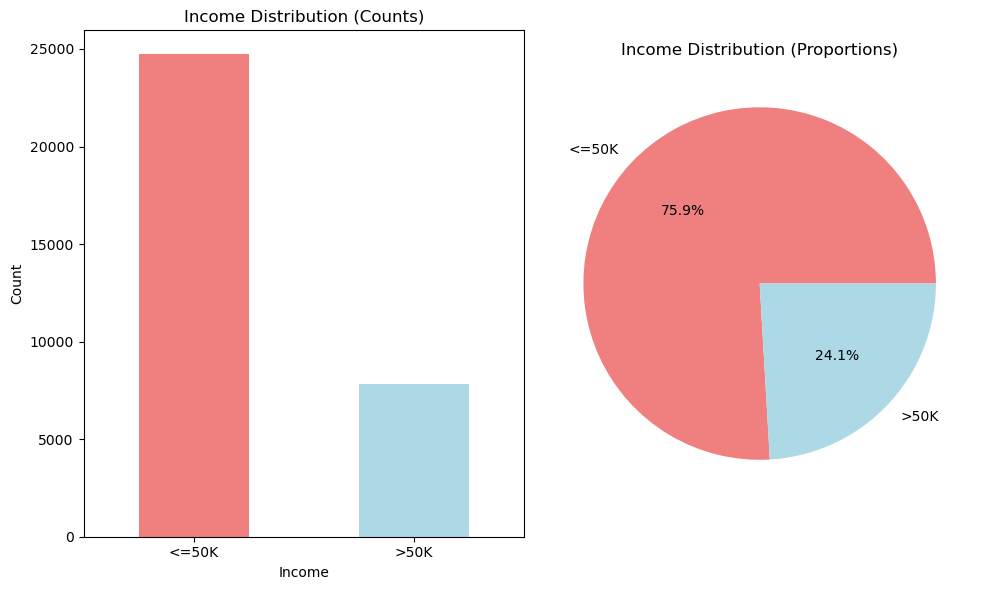

In [8]:
# Analyze the target variable (income)
print("Target Variable Distribution:")
target_counts = df['income'].value_counts()
target_props = df['income'].value_counts(normalize=True)

print(f"Counts:\n{target_counts}")
print(f"\nProportions:\n{target_props}")

# Visualize target distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
target_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Income Distribution (Counts)')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
target_props.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Income Distribution (Proportions)')
plt.ylabel('')

plt.tight_layout()
plt.show()

## 5. Numerical Variables Analysis

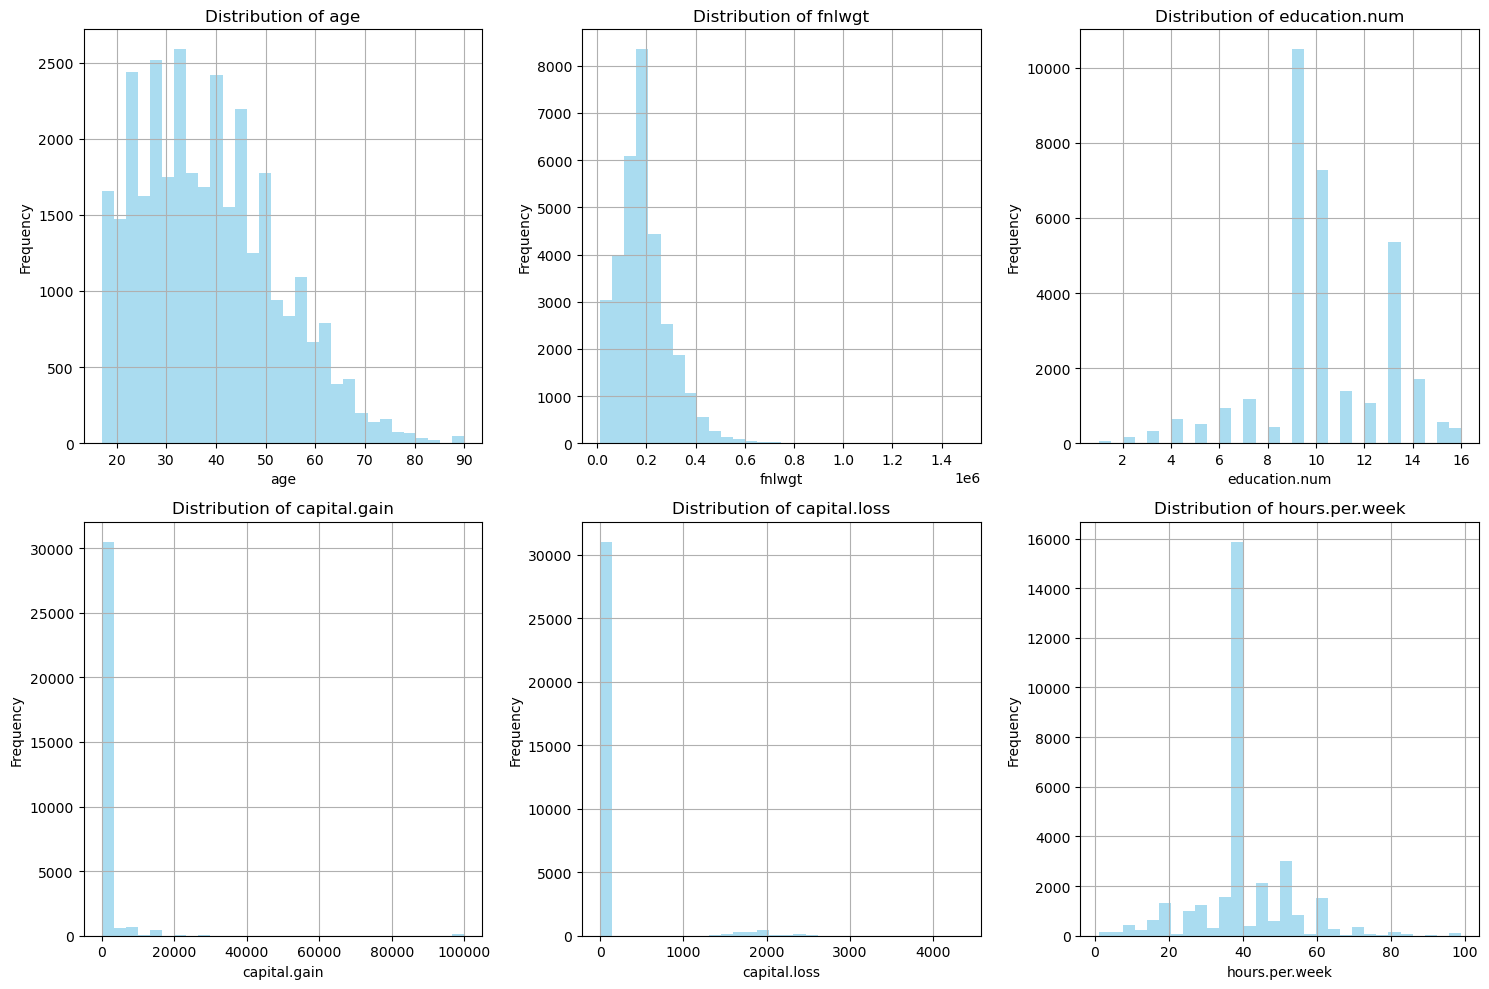

In [9]:
# Distribution of numerical variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

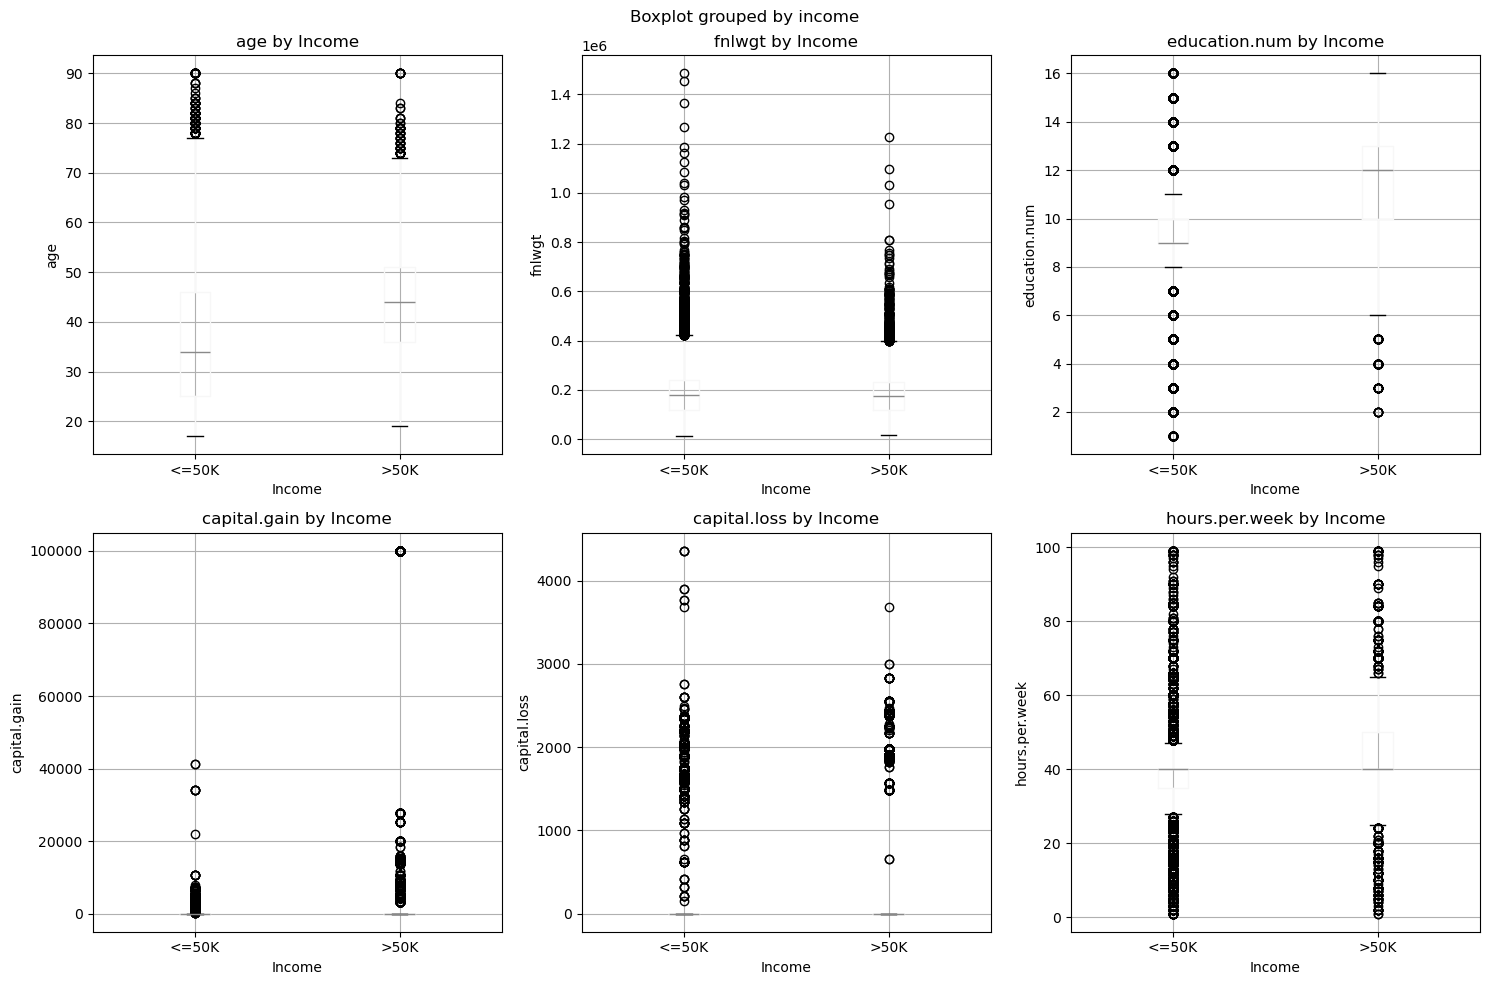

In [10]:
# Box plots for numerical variables by income
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        df.boxplot(column=col, by='income', ax=axes[i])
        axes[i].set_title(f'{col} by Income')
        axes[i].set_xlabel('Income')
        axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## 6. Categorical Variables Analysis

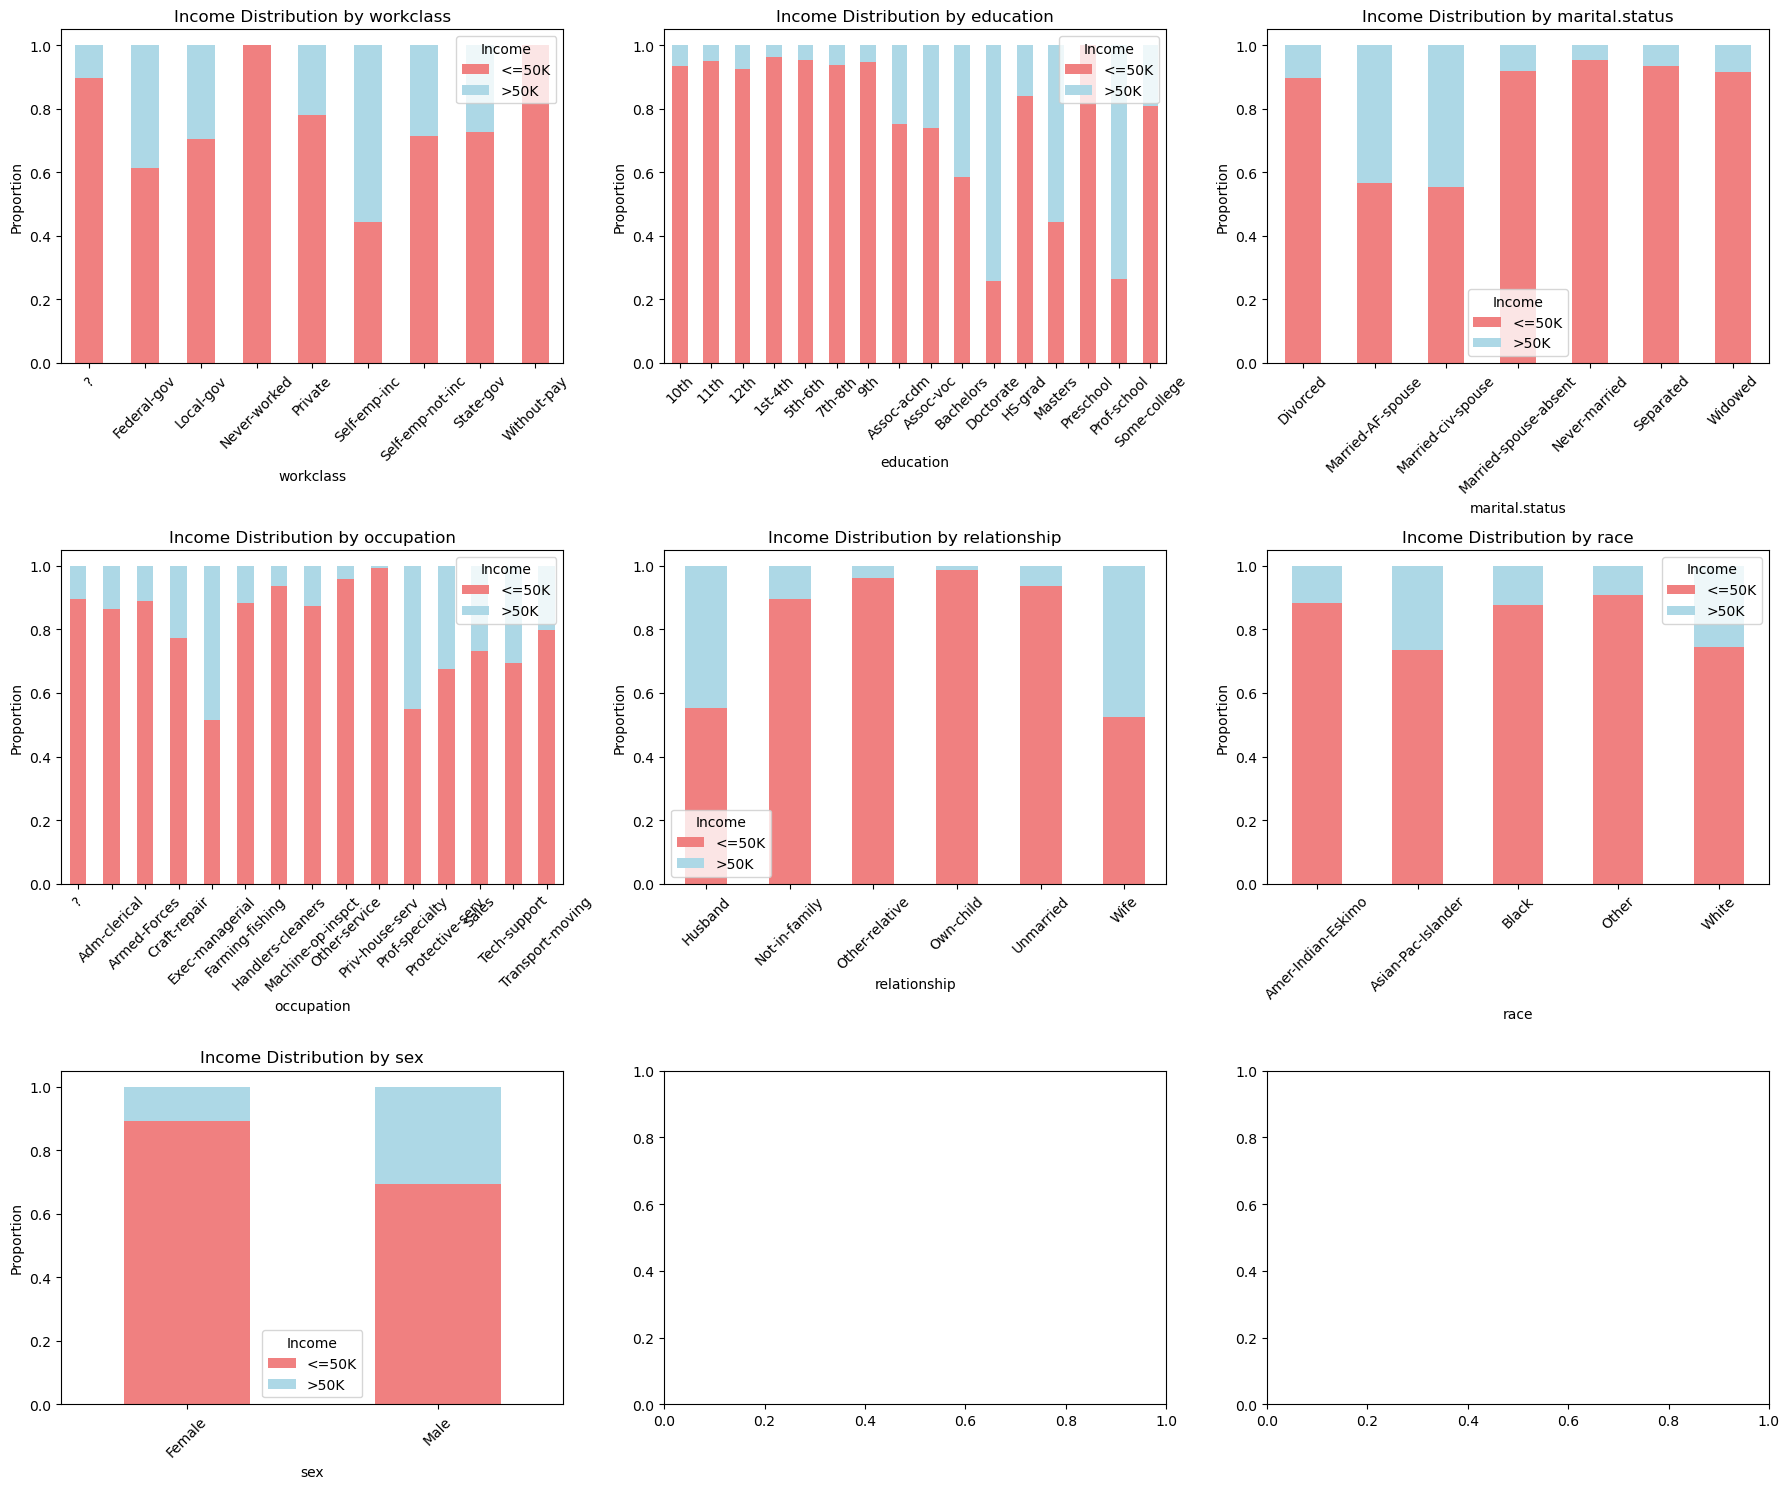

In [11]:
# Income distribution by key categorical variables
key_categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(key_categorical):
    if i < len(axes):
        # Create crosstab
        ct = pd.crosstab(df[col], df['income'], normalize='index')
        ct.plot(kind='bar', ax=axes[i], stacked=True, color=['lightcoral', 'lightblue'])
        axes[i].set_title(f'Income Distribution by {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Proportion')
        axes[i].legend(title='Income')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

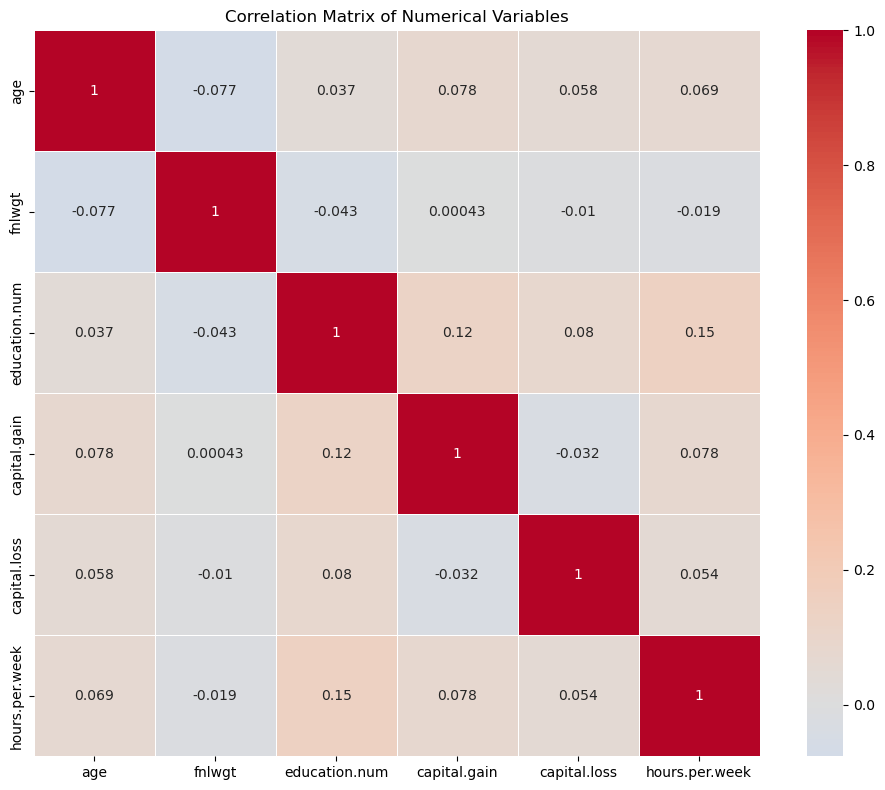

Strong correlations (|correlation| > 0.5):


In [12]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

print("Strong correlations (|correlation| > 0.5):")
strong_corr = correlation_matrix.abs() > 0.5
strong_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if strong_corr.iloc[i, j]:
            strong_corr_pairs.append((correlation_matrix.columns[i], 
                                    correlation_matrix.columns[j], 
                                    correlation_matrix.iloc[i, j]))

for pair in strong_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

## 8. Key Insights and Summary

In [13]:
# Summary statistics by income group
print("Mean values by income group:")
print(df.groupby('income')[numerical_cols].mean())
print("\n" + "="*70 + "\n")

print("Age distribution by income:")
print(df.groupby('income')['age'].describe())
print("\n" + "="*70 + "\n")

print("Education level distribution by income:")
education_income = pd.crosstab(df['education'], df['income'], normalize='index')
print(education_income.round(3))

Mean values by income group:
              age        fnlwgt  education.num  capital.gain  capital.loss  \
income                                                                       
<=50K   36.783738  190340.86517       9.595065    148.752468     53.142921   
>50K    44.249841  188005.00000      11.611657   4006.142456    195.001530   

        hours.per.week  
income                  
<=50K        38.840210  
>50K         45.473026  


Age distribution by income:
          count       mean        std   min   25%   50%   75%   max
income                                                             
<=50K   24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0
>50K     7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0


Education level distribution by income:
income        <=50K   >50K
education                 
10th          0.934  0.066
11th          0.949  0.051
12th          0.924  0.076
1st-4th       0.964  0.036
5th-6th       0.952  0.048
7th-8th       0.938  0.06

In [14]:
# Create a comprehensive summary
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*50)
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Target Variable: Binary classification - {df['income'].unique()}")
print(f"Class Distribution: {dict(df['income'].value_counts())}")
print(f"Missing Values: {df.isnull().sum().sum()} total")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Numerical Features: {len(numerical_cols)}")
print(f"Categorical Features: {len(categorical_cols)}")
print("\nKey Observations:")
print("- Dataset appears to be the Adult/Census Income dataset")
print("- Target is imbalanced (more <=50K than >50K)")
print("- Some missing values represented as '?' in categorical variables")
print("- Strong correlation between education and education.num")
print("- Age, education, and hours.per.week appear to be key predictors")

EXPLORATORY DATA ANALYSIS SUMMARY
Dataset Shape: 32561 rows, 15 columns
Target Variable: Binary classification - ['<=50K' '>50K']
Class Distribution: {'<=50K': 24720, '>50K': 7841}
Missing Values: 0 total
Duplicates: 24
Numerical Features: 6
Categorical Features: 9

Key Observations:
- Dataset appears to be the Adult/Census Income dataset
- Target is imbalanced (more <=50K than >50K)
- Some missing values represented as '?' in categorical variables
- Strong correlation between education and education.num
- Age, education, and hours.per.week appear to be key predictors


# Income Disparity Analysis by Demographics

## Comprehensive Analysis of Income Disparities Across Race, Sex, and Native Country

This section provides a detailed analysis of income disparities across different demographic groups to identify potential inequalities in income distribution.